In [2]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
from plot_tools import plot_response


In [13]:
A = np.array(
    [[-6, -25],
     [1, 0]]
)

B = np.array(
    [[3], 
     [0]]
)

C = np.array(
    [[0, 1]]
)

D = 0

P = ct.ss(A, B, C, D)
display(P)

<LinearIOSystem:sys[10]:['u[0]']->['y[0]']>

In [37]:
K = ct.place(A, B, [-10, -20])
kf = 200 / 3

In [39]:
Pcl = ct.ss(A - B * K, B*kf, C, D)
display(Pcl)
Pcl = ct.tf(ct.minreal(Pcl))
display(Pcl)

<LinearIOSystem:sys[36]:['u[0]']->['y[0]']>

0 states have been removed from the model


TransferFunction(array([200.]), array([  1.,  30., 200.]))

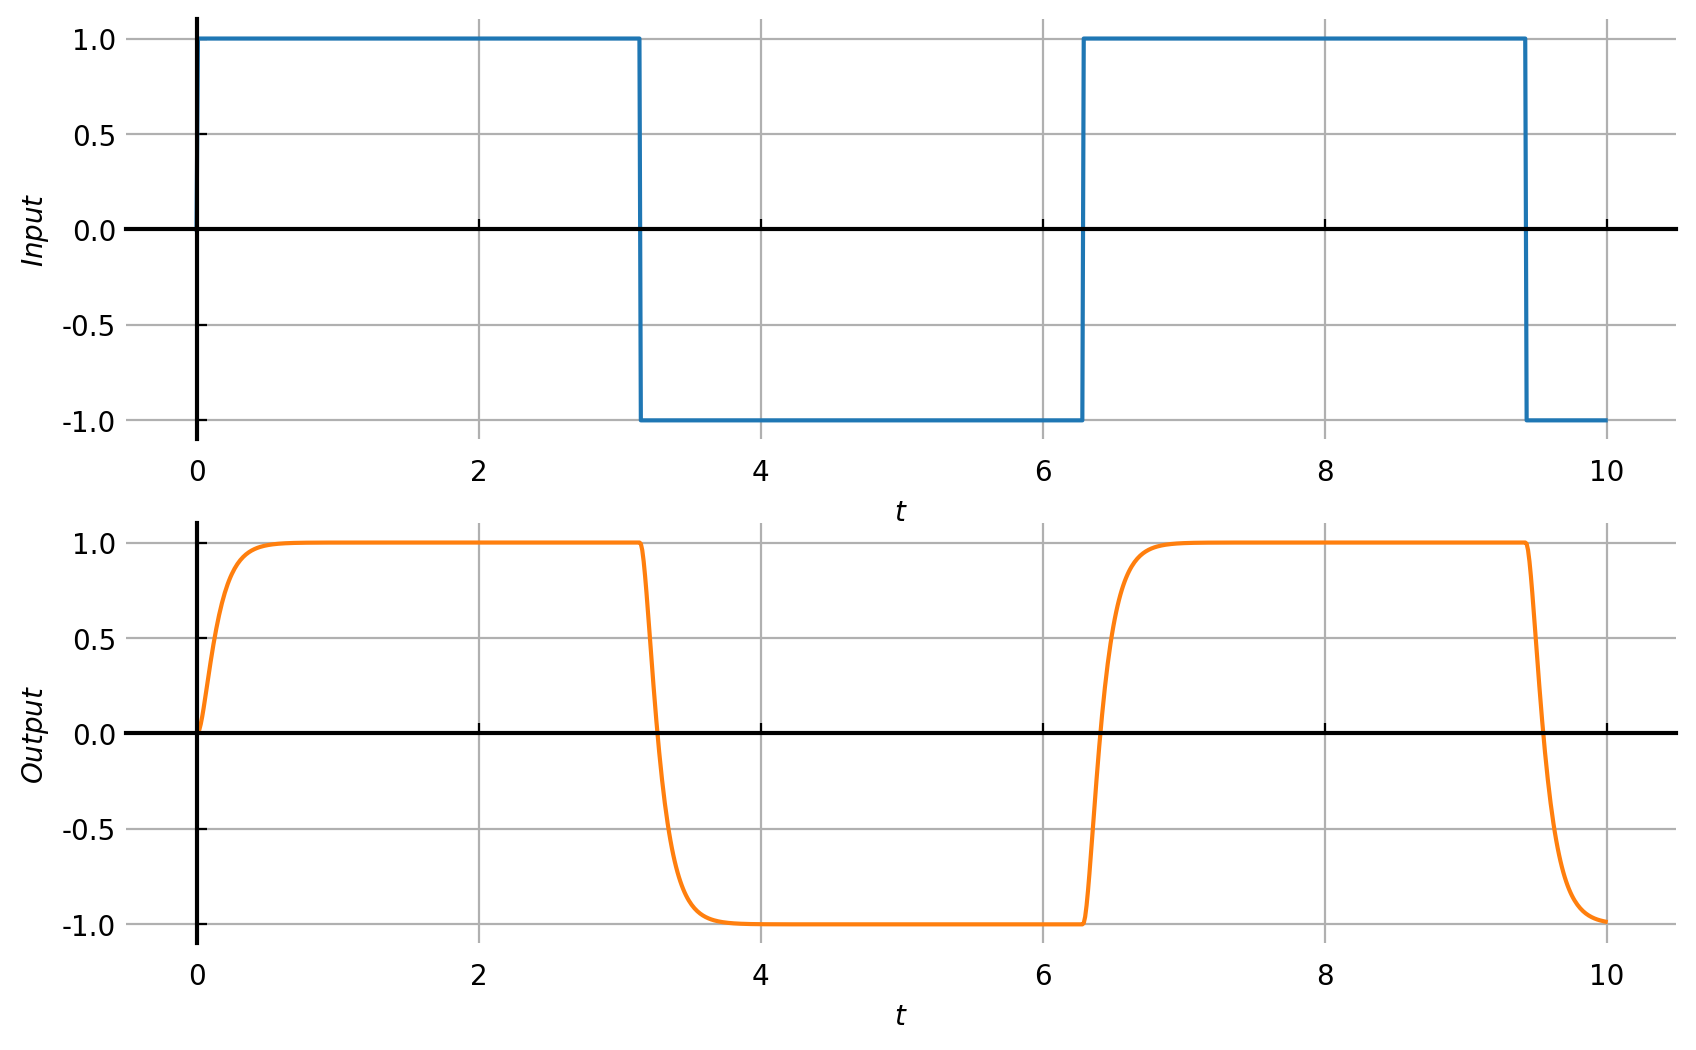

In [40]:

dt = 0.01
T = 10

t = np.arange(0, T, dt)

r = np.sign(np.sin(t))
outy = ct.forced_response(Pcl, t, r)

fig, ax = plot_response(t, r, outy.y[0]);
plt.show()

In [121]:

Gur = ct.feedback(C, P)
display(Gur)
outu = ct.forced_response(Gur, t, r)
fig, ax = plot_response(t, r, outu.y[0]);
plt.show()

TransferFunction(array([0.1, 0.6, 2.5, 0. ]), array([ 1. ,  8.5, 25. ]))

ValueError: Transfer function is non-proper; can't convert to StateSpace system.